# Packages

In [1]:
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
import seaborn           as sns

In [2]:
plotpars = {'axes.labelsize': 18,
            'axes.linewidth': 1.,
            'figure.figsize': (7.,5.),
            'font.size': 20,
            'legend.frameon': True,
            'legend.framealpha': 0.85,
            'legend.edgecolor': 'black',
            'legend.loc': 'best',
            'legend.fontsize': 12,
            'mathtext.fontset': 'stixsans',
            'savefig.bbox': 'tight',
            'xtick.labelsize': 18,
            'ytick.labelsize': 18,
           }

plotpars_3rows = {'axes.labelsize': 18,
                  'axes.linewidth': 1.,
                  'figure.figsize': (6, 9),
                  'font.size': 12,
                  'legend.frameon': True,
                  'legend.framealpha': 0.85,
                  'legend.edgecolor': 'black',
                  'legend.loc': 'best',
                  'legend.fontsize': 12,
                  'mathtext.fontset': 'stixsans',
                  'savefig.bbox': 'tight',
                  'xtick.labelsize': 15,
                  'ytick.labelsize': 15,
                 }

plotpars_3cols = {'axes.labelsize': 18,
                  'axes.linewidth': 1.,
                  'figure.figsize': (12, 3.5),
                  'font.size': 12,
                  'legend.frameon': True,
                  'legend.framealpha': 0.85,
                  'legend.edgecolor': 'black',
                  'legend.loc': 'best',
                  'legend.fontsize': 12,
                  'mathtext.fontset': 'stixsans',
                  'savefig.bbox': 'tight',
                  'xtick.labelsize': 15,
                  'ytick.labelsize': 15,
                 }

# Dataset

In [3]:
my_data   = pd.read_csv('../Catalogue/Match07_smalldoubleclean_emlines.csv')
dust_data = pd.read_csv('../Match/ALL_GAMA_MAGPHYS_SELECTED.csv')

In [4]:
fuv_k = []
nuv_k = []
r_k = []
uvclass = []
for i in range(my_data['UV_CLASS_YI2011'].values.size):
    fuv_k.append(my_data['KCORR_FUV'].values[i])
    nuv_k.append(my_data['KCORR_NUV'].values[i])
    r_k.append(my_data['KCORR_R'].values[i])
    uvclass.append(my_data['UV_CLASS_YI2011'].values[i])

fuv_k   = np.array(fuv_k)
nuv_k   = np.array(nuv_k)
r_k     = np.array(r_k)
uvclass = np.array(uvclass)

header = np.array(['KCORR_FUV', 'KCORR_NUV', 'KCORR_R', 'UV_CLASS'])
kcorr_data = np.column_stack([fuv_k, nuv_k, r_k, uvclass])
kcorr_data = pd.DataFrame(kcorr_data, columns=header)

In [5]:
palette = ['#1b9e77','#d95f02','#7570b3']

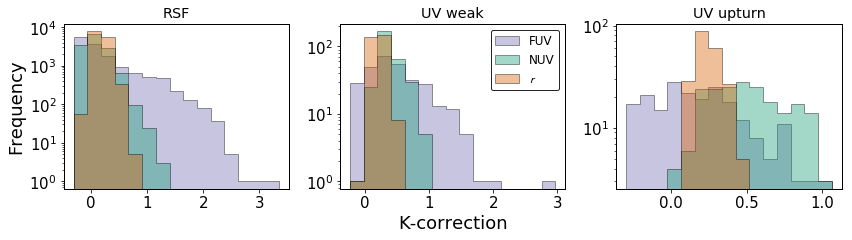

In [6]:
plt.rcParams.update(plotpars_3cols)

plt.subplot(1,3,1)
n, bins, patches = plt.hist(x=fuv_k[kcorr_data['UV_CLASS']=='RSF'], bins=15, color=palette[2], edgecolor='black', 
                            alpha=0.4, label='FUV', histtype='stepfilled')
plt.hist(x=nuv_k[kcorr_data['UV_CLASS']=='RSF'], bins=bins, color=palette[0], edgecolor='black', alpha=0.4, 
         label='NUV', histtype='stepfilled')
plt.hist(x=r_k[kcorr_data['UV_CLASS']=='RSF'], bins=bins, color=palette[1], edgecolor='black', alpha=0.4, 
         label='$r$', histtype='stepfilled')
plt.title('RSF')
plt.ylabel('Frequency')
plt.yscale('log')


plt.subplot(1,3,2)
n, bins, patches = plt.hist(x=fuv_k[kcorr_data['UV_CLASS']=='UV_WEAK'], bins=15, color=palette[2], edgecolor='black',
                            alpha=0.4, label='FUV', histtype='stepfilled')
plt.hist(x=nuv_k[kcorr_data['UV_CLASS']=='UV_WEAK'], bins=bins, edgecolor='black', color=palette[0], alpha=0.4,
         label='NUV', histtype='stepfilled')
plt.hist(x=r_k[kcorr_data['UV_CLASS']=='UV_WEAK'], bins=bins, edgecolor='black', color=palette[1], alpha=0.4,
         label='$r$', histtype='stepfilled')
plt.title('UV weak')
# plt.ylabel('Frequency')
plt.xlabel('K-correction')
plt.yscale('log')
plt.legend(loc='best')

plt.subplot(1,3,3)
n, bins, patches = plt.hist(x=fuv_k[kcorr_data['UV_CLASS']=='UV_UPTURN'], bins=15, color=palette[2], 
                            edgecolor='black', alpha=0.4, label='FUV', histtype='stepfilled')
plt.hist(x=nuv_k[kcorr_data['UV_CLASS']=='UV_UPTURN'], bins=bins, edgecolor='black', color=palette[0], alpha=0.4,
         label='NUV', histtype='stepfilled')
plt.hist(x=r_k[kcorr_data['UV_CLASS']=='UV_UPTURN'],   bins=bins, edgecolor='black', color=palette[1], alpha=0.4,
         label='$r$', histtype='stepfilled')
plt.title('UV upturn')
plt.yscale('log')
plt.tight_layout()
plt.savefig('../LargeFilesResults/PaperFigs/kcorrections.pdf')
plt.savefig('../LargeFilesResults/PaperFigs/kcorrections.png')
plt.show()

In [7]:
new_match = my_data.merge(dust_data, on=['CATAID'], how='left', indicator=True)

L_dust_best_fit

L_dust_percentile2_5

L_dust_percentile16

L_dust_percentile50

L_dust_percentile84

L_dust_percentile97_5

mass_dust_best_fit

mass_dust_percentile2_5

mass_dust_percentile16

mass_dust_percentile50

mass_dust_percentile84

mass_dust_percentile97_5

tlastb_percentile2_5

tlastb_percentile16

tlastb_percentile50

tlastb_percentile84

tlastb_percentile97_5

_merge

In [8]:
for i in range(new_match['CATAID'].values.size):
    if new_match['_merge'].values[i]!='both':
        print (new_match['UV_CLASS_YI2011'].values[i])
        print (new_match['L_dust_best_fit'].values[i])
    else:
        continue

RSF
nan
RSF
nan


In [9]:
uv_weak_objs = new_match[new_match['UV_CLASS_YI2011']=='UV_WEAK']
uv_uptr_objs = new_match[new_match['UV_CLASS_YI2011']=='UV_UPTURN']

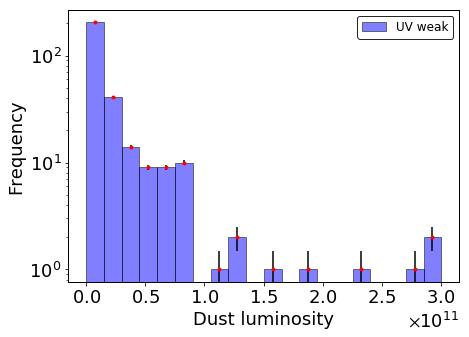

In [10]:
plt.rcParams.update(plotpars)

n1, bins1, patches1 = plt.hist(uv_weak_objs['L_dust_best_fit'], color='blue', bins=20, alpha=0.5, label='UV weak', 
                               edgecolor='black')
bins1_centers = (bins1[1:]+bins1[:-1])/2
plt.errorbar(x=bins1_centers, y=n1, yerr=0.5, ecolor='black', color='black', fmt='r.')
plt.yscale('log')
plt.xlabel('Dust luminosity')
plt.ylabel('Frequency')
plt.ticklabel_format(axis='x', useMathText=True)
plt.legend(loc='best')
plt.show()

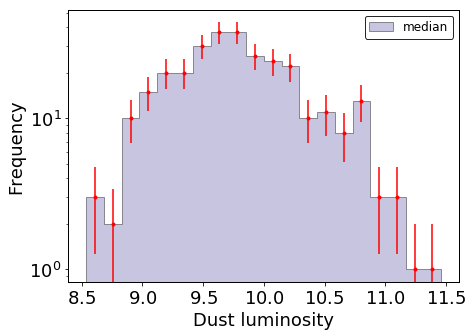

In [11]:
palette = ['#1b9e77','#d95f02','#7570b3']

plt.rcParams.update(plotpars)

n1, bins1, patches1 = plt.hist(uv_weak_objs['L_dust_percentile50'].values, color=palette[2], bins=20, alpha=0.4, 
                               edgecolor='black', histtype='stepfilled', label='median')
bins1_centers = (bins1[1:]+bins1[:-1])/2
# e = np.round(((uv_weak_objs['L_dust_percentile97_5'].values-uv_weak_objs['L_dust_percentile2_5'].values)/2.), 3)

# yerr = e.astype(float)
plt.errorbar(x=bins1_centers, y=n1, yerr=np.sqrt(n1), color='black', fmt='r.')
# plt.errorbar(x=bins1_centers, y=n1, lolims=uv_weak_objs['L_dust_percentile2_5'].values, 
#              uplims=uv_weak_objs['L_dust_percentile97_5'].values, color='black', fmt='r.')
plt.yscale('log')
plt.xlabel('Dust luminosity')
plt.ylabel('Frequency')
plt.ticklabel_format(axis='x', useMathText=True)
plt.legend(loc='best')
plt.show()

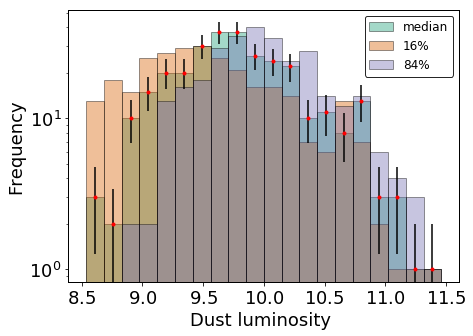

In [12]:
palette = ['#1b9e77','#d95f02','#7570b3']

plt.rcParams.update(plotpars)

n1, bins1, patches1 = plt.hist(uv_weak_objs['L_dust_percentile50'], color=palette[0], bins=20, alpha=0.4, 
                               edgecolor='black', label='median')
# n2, bins2, patches2 = plt.hist(uv_weak_objs['L_dust_percentile16'], color=palette[1], bins=bins1, alpha=0.4, 
#                                edgecolor='black', label='16%')
# n3, bins3, patches3 = plt.hist(uv_weak_objs['L_dust_percentile84'], color=palette[2], bins=bins1, alpha=0.4, 
#                                edgecolor='black', label='84%')
plt.hist(uv_weak_objs['L_dust_percentile16'], color=palette[1], bins=bins1, alpha=0.4, edgecolor='black', label='16%')
plt.hist(uv_weak_objs['L_dust_percentile84'], color=palette[2], bins=bins1, alpha=0.4, edgecolor='black', label='84%')
bins1_centers = (bins1[1:]+bins1[:-1])/2
plt.errorbar(x=bins1_centers, y=n1, yerr=np.sqrt(n1), ecolor='black', fmt='r.')
# plt.errorbar(x=bins1_centers, y=n2, yerr=np.sqrt(n2), ecolor='gray', fmt='r.')
# plt.errorbar(x=bins1_centers, y=n3, yerr=np.sqrt(n3), ecolor='gray', fmt='r.')
# n2, bins2, patches2 = plt.hist(uv_uptr_objs['L_dust_percentile50'], histtype='stepfilled', color='green', bins=bins1, 
#                                alpha=0.5, label='UV upturn', edgecolor='black')
plt.yscale('log')
plt.xlabel('Dust luminosity ')
plt.ylabel('Frequency')
plt.ticklabel_format(axis='x', useMathText=True)
plt.legend(loc='best')
plt.show()

/home/mlldantas/anaconda3/envs/py3k6/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


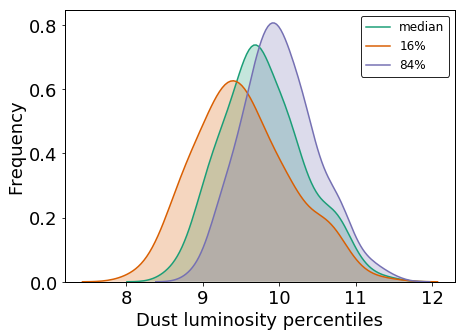

In [13]:
palette = ['#1b9e77','#d95f02','#7570b3']

plt.rcParams.update(plotpars)

sns.kdeplot(uv_weak_objs['L_dust_percentile50'], color=palette[0], label='median', shade=True)
sns.kdeplot(uv_weak_objs['L_dust_percentile16'], color=palette[1], label='16%', shade=True)
sns.kdeplot(uv_weak_objs['L_dust_percentile84'], color=palette[2], label='84%', shade=True)

# plt.hist(uv_weak_objs['L_dust_percentile84'], color=palette[1], bins=bins1, alpha=0.4, edgecolor='black', 
#          histtype='stepfilled', label='84%')
# bins1_centers = (bins1[1:]+bins1[:-1])/2
# plt.errorbar(x=bins1_centers, y=n1, yerr=0.5, color='black', fmt='r.')
# n2, bins2, patches2 = plt.hist(uv_uptr_objs['L_dust_percentile50'], histtype='stepfilled', color='green', bins=bins1, 
#                                alpha=0.5, label='UV upturn', edgecolor='black')
# plt.yscale('log')
plt.xlabel('Dust luminosity percentiles')
plt.ylabel('Frequency')
# plt.ticklabel_format(axis='x', useMathText=True)
plt.legend(loc='best')
plt.show()

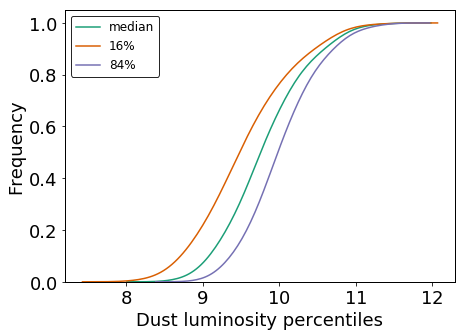

In [14]:
palette = ['#1b9e77','#d95f02','#7570b3']

plt.rcParams.update(plotpars)

sns.kdeplot(uv_weak_objs['L_dust_percentile50'], color=palette[0], label='median', cumulative=True)
sns.kdeplot(uv_weak_objs['L_dust_percentile16'], color=palette[1], label='16%', cumulative=True)
sns.kdeplot(uv_weak_objs['L_dust_percentile84'], color=palette[2], label='84%', cumulative=True)

# plt.hist(uv_weak_objs['L_dust_percentile84'], color=palette[1], bins=bins1, alpha=0.4, edgecolor='black', 
#          histtype='stepfilled', label='84%')
# bins1_centers = (bins1[1:]+bins1[:-1])/2
# plt.errorbar(x=bins1_centers, y=n1, yerr=0.5, color='black', fmt='r.')
# n2, bins2, patches2 = plt.hist(uv_uptr_objs['L_dust_percentile50'], histtype='stepfilled', color='green', bins=bins1, 
#                                alpha=0.5, label='UV upturn', edgecolor='black')
# plt.yscale('log')
plt.xlabel('Dust luminosity percentiles')
plt.ylabel('Frequency')
plt.ticklabel_format(axis='x', useMathText=True)
plt.legend(loc='best')
plt.show()

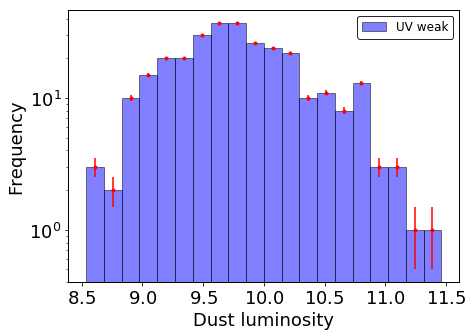

In [15]:
plt.rcParams.update(plotpars)
plt.title
n1, bins1, patches1 = plt.hist(uv_weak_objs['L_dust_percentile50'], color='blue', bins=20, 
                               alpha=0.5, label='UV weak', edgecolor='black')
bins1_centers = (bins1[1:]+bins1[:-1])/2
plt.errorbar(x=bins1_centers, y=n1, yerr=0.5, color='black', fmt='r.')
# n2, bins2, patches2 = plt.hist(uv_uptr_objs['L_dust_percentile50'], histtype='stepfilled', color='green', bins=bins1, 
#                                alpha=0.5, label='UV upturn', edgecolor='black')
plt.yscale('log')
plt.xlabel('Dust luminosity')
plt.ylabel('Frequency')
plt.ticklabel_format(axis='x', useMathText=True)
plt.legend(loc='best')
plt.show()

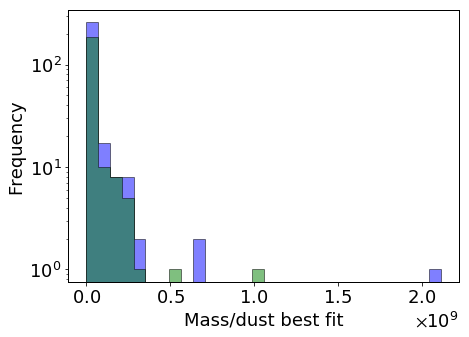

In [16]:
plt.rcParams.update(plotpars)

n, bins, patches = plt.hist(uv_weak_objs['mass_dust_best_fit'], histtype='stepfilled', color='blue', bins=30, 
                            alpha=0.5, edgecolor='black', label='UV weak')
plt.hist(uv_uptr_objs['mass_dust_best_fit'], histtype='stepfilled', color='green', bins=bins, alpha=0.5, 
         edgecolor='black', label='UV upturn')
plt.yscale('log')
plt.xlabel('Mass/dust best fit')
plt.ylabel('Frequency')
plt.ticklabel_format(axis='x', useMathText=True)
plt.show()

In [17]:
(bins1[1:]-bins1[:-1])/2

array([0.073075, 0.073075, 0.073075, 0.073075, 0.073075, 0.073075,
       0.073075, 0.073075, 0.073075, 0.073075, 0.073075, 0.073075,
       0.073075, 0.073075, 0.073075, 0.073075, 0.073075, 0.073075,
       0.073075, 0.073075])

In [18]:
bins1[:-1]

array([ 8.537  ,  8.68315,  8.8293 ,  8.97545,  9.1216 ,  9.26775,
        9.4139 ,  9.56005,  9.7062 ,  9.85235,  9.9985 , 10.14465,
       10.2908 , 10.43695, 10.5831 , 10.72925, 10.8754 , 11.02155,
       11.1677 , 11.31385])

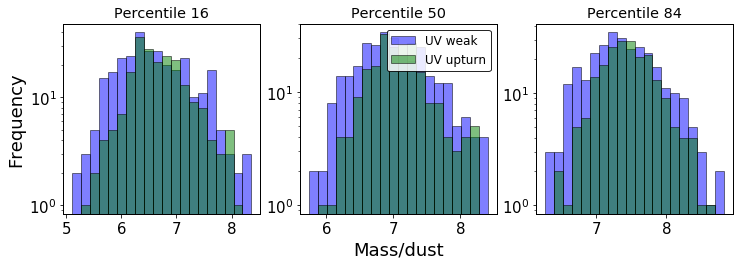

In [19]:
plt.rcParams.update(plotpars_3cols)

plt.subplot(1,3,1)
plt.title('Percentile 16')
n, bins, patches = plt.hist(uv_weak_objs['mass_dust_percentile16'], color='blue', bins=20, 
                            alpha=0.5, edgecolor='black', label='UV weak')
plt.hist(uv_uptr_objs['mass_dust_percentile16'], color='green', bins=bins, alpha=0.5, 
         edgecolor='black', label='UV upturn')
plt.yscale('log')
plt.ylabel('Frequency')
plt.ticklabel_format(axis='x', useMathText=True)

plt.subplot(1,3,2)
plt.title('Percentile 50')
n, bins, patches = plt.hist(uv_weak_objs['mass_dust_percentile50'], color='blue', bins=20, 
                            alpha=0.5, edgecolor='black', label='UV weak')
plt.hist(uv_uptr_objs['mass_dust_percentile50'], color='green', bins=bins, alpha=0.5, 
         edgecolor='black', label='UV upturn')
plt.yscale('log')
plt.xlabel('Mass/dust')
plt.legend(loc='best')
plt.ticklabel_format(axis='x', useMathText=True)

plt.subplot(1,3,3)
plt.title('Percentile 84')
n, bins, patches = plt.hist(uv_weak_objs['mass_dust_percentile84'], color='blue', bins=20, 
                            alpha=0.5, edgecolor='black', label='UV weak')
plt.hist(uv_uptr_objs['mass_dust_percentile84'], color='green', bins=bins, alpha=0.5, 
         edgecolor='black', label='UV upturn')
plt.yscale('log')
plt.ticklabel_format(axis='x', useMathText=True)

plt.show()

In [20]:
mass_fraction_uvup = dust_data['mass_stellar_best_fit']/dust_data['mass_dust_best_fit']

In [21]:
mass_fraction_uvup.columns = ['mass_fraction_magphys']

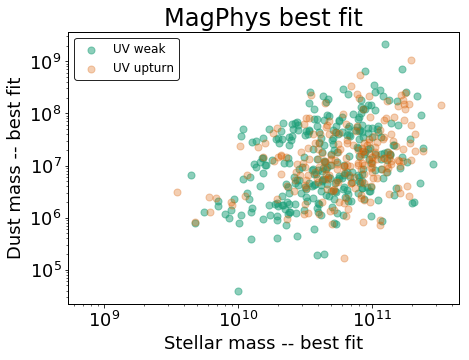

In [78]:
plt.rcParams.update(plotpars)
plt.title('MagPhys best fit')
plt.scatter(x=uv_weak_objs['mass_stellar_best_fit'], y=uv_weak_objs['mass_dust_best_fit'], alpha=0.5, c=palette[0], 
            label='UV weak', s=50)
plt.scatter(x=uv_uptr_objs['mass_stellar_best_fit'], y=uv_uptr_objs['mass_dust_best_fit'], alpha=0.3, c=palette[1], 
            label='UV upturn', s=50)
plt.xlabel('Stellar mass -- best fit')
plt.ylabel('Dust mass -- best fit')
plt.legend(loc='best')
plt.yscale('log')
plt.xscale('log')
plt.savefig('../LargeFilesResults/PaperFigs/stellar_vs_dust_mass_scatter.png')
plt.savefig('../LargeFilesResults/PaperFigs/stellar_vs_dust_mass_scatter.pdf')
plt.show()

In [24]:
# %matplotlib notebook

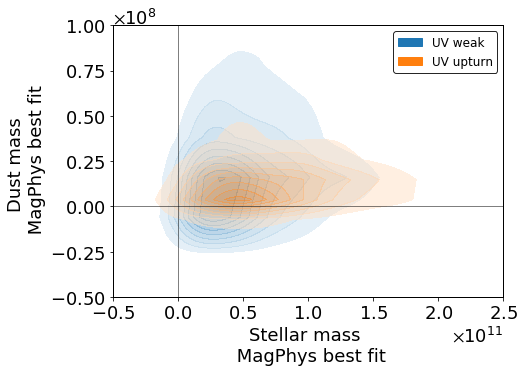

In [58]:
plt.rcParams.update(plotpars)
sns.kdeplot(data=uv_weak_objs['mass_stellar_best_fit'].values, data2=uv_weak_objs['mass_dust_best_fit'].values, 
            label='UV weak', shade=True, shade_lowest=False, alpha=0.5)
sns.kdeplot(data=uv_uptr_objs['mass_stellar_best_fit'].values, data2=uv_uptr_objs['mass_dust_best_fit'].values, 
            label='UV upturn', shade=True, shade_lowest=False, alpha=0.5)
plt.axhline(y=0., lw=0.5, color='black')
plt.axvline(x=0., lw=0.5, color='black')
plt.legend(loc='best')
plt.xlabel('Stellar mass \n MagPhys best fit')
plt.ylabel('Dust mass \n MagPhys best fit')
plt.ylim([-0.5e8, 1e8])
plt.xlim([-0.5e11, 2.5e11])
plt.ticklabel_format(axis='both', useMathText=True)
plt.savefig('../LargeFilesResults/PaperFigs/stellar_vs_dust_mass.png')
plt.savefig('../LargeFilesResults/PaperFigs/stellar_vs_dust_mass.pdf')
plt.show()

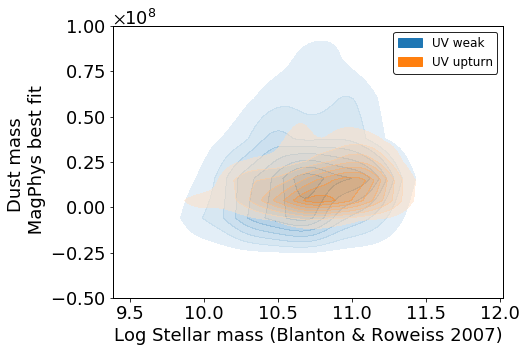

In [76]:
plt.rcParams.update(plotpars)
sns.kdeplot(data=uv_weak_objs['logmstar'].values, data2=uv_weak_objs['mass_dust_best_fit'].values, 
            label='UV weak', shade=True, shade_lowest=False, alpha=0.5)
sns.kdeplot(data=uv_uptr_objs['logmstar'].values, data2=uv_uptr_objs['mass_dust_best_fit'].values, 
            label='UV upturn', shade=True, shade_lowest=False, alpha=0.5)
plt.legend(loc='best')
plt.xlabel('Log Stellar mass (Blanton & Roweiss 2007)')
plt.ylabel('Dust mass \n MagPhys best fit')
plt.ylim([-0.5e8, 1e8])
plt.ticklabel_format(axis='y', useMathText=True)
plt.savefig('../LargeFilesResults/PaperFigs/stellar_vs_dust_mass_II.png')
plt.savefig('../LargeFilesResults/PaperFigs/stellar_vs_dust_mass_II.pdf')
plt.show()

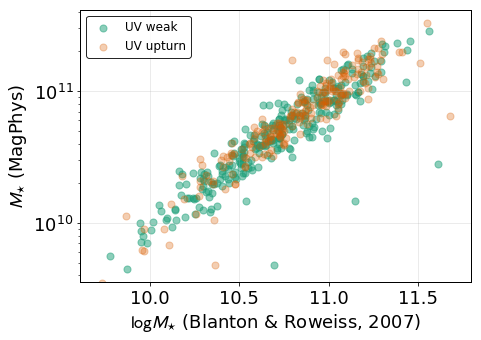

In [81]:
plt.rcParams.update(plotpars)
plt.scatter(x=uv_weak_objs['logmstar'], y=uv_weak_objs['mass_stellar_best_fit'], alpha=0.5, c=palette[0], 
            label='UV weak', s=50)
plt.scatter(x=uv_uptr_objs['logmstar'], y=uv_uptr_objs['mass_stellar_best_fit'], alpha=0.3, c=palette[1], 
            label='UV upturn', s=50)
plt.xlabel(r"$\log M_{\star}$ (Blanton & Roweiss, 2007)")
plt.ylabel(r"$M_{\star}$ (MagPhys)")
plt.legend(loc='best')
plt.yscale('log')
# plt.xscale('log')
plt.grid(alpha=0.3)
plt.savefig('../LargeFilesResults/PaperFigs/stellar_masses.png')
plt.savefig('../LargeFilesResults/PaperFigs/stellar_masses.pdf')
plt.show()